# COVID-19 Impact on S&P 500 

### Parth Merchant
This is a Jupyter Notebook containing data preprocessing, cleaning as well as exploratory analysis and data visualization. 

First, I import all necessary libraries I need to make API requests, perform data analysis as well as clean and preprocess the data. I imported NumPy, math, Matplotlib, Pandas and Seaborn for data analysis. I imported requests to make API requests to the NewsAPI as well as another news API through RapidAPI used specifically for COVID-19 data. CSV and JSON are used to converting response text from APIs into JSON for parsing and then csv for formatting the data. 

In [1]:
import numpy
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv 
import requests
import json
import os

In [2]:
sp500index = pd.read_csv("../datasets/S&P_500_Index.csv")
sp500SectoralIndex = pd.read_csv("../datasets/S&P_500_Sectoral_Indexes.csv")

In [3]:
sp500index.dtypes

Date              object
S&P 500 Index    float64
dtype: object

In [4]:
sp500index.head()

,Date,S&P 500 Index
0,2019-12-16,3191.449951
1,2019-12-17,3192.520020
2,2019-12-18,3191.139893
3,2019-12-19,3205.370117
4,2019-12-20,3221.219971


(1000.0, 5000.0)

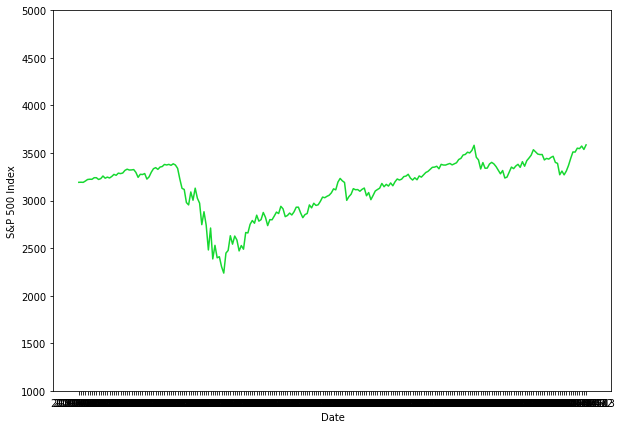

In [5]:
plt.figure(figsize=(10,7))
sp_LineChart = sns.lineplot(x="Date", y="S&P 500 Index", data=sp500index, color="#16D830")
plt.ylim(1000, 5000)

In [6]:
sp500SectoralIndex.head()
sectorColumns = [sp500SectoralIndex['XLB Materials'], sp500SectoralIndex['XLC Communication Services'], sp500SectoralIndex['XLE Energy']]

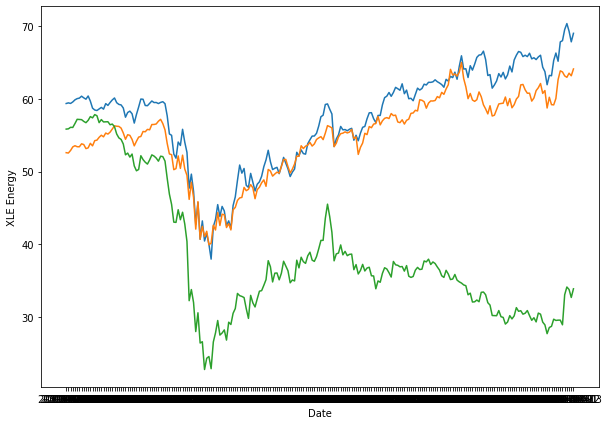

In [7]:
plt.figure(figsize=(10,7))

current_palette = sns.color_palette("ch:2.5,-.2,dark=.3")

for sector in sectorColumns:
    sector_LinePlots = sns.lineplot(x="Date", y=sector, data=sp500SectoralIndex, palette=current_palette)

## COVID-19 News API (RapidAPI)

### (05/01/2020 - 05/31/2020 COVID News Articles)

In [8]:
url = "https://covid-19-news.p.rapidapi.com/v1/covid"

querystring = {"q":"covid","to":"2020/05/31","lang":"en","media":"True","from":"2020/05/01"}

headers = {
    'x-rapidapi-key': "84010bc0damsh9e9ba15f04e16e3p112d40jsn09225ea01f32",
    'x-rapidapi-host': "covid-19-news.p.rapidapi.com"
    }

may_response = requests.request("GET", url, headers=headers, params=querystring)

### (06/01/2020 - 06/30/2020 COVID News Articles)

In [9]:
url = "https://covid-19-news.p.rapidapi.com/v1/covid"

querystring = {"q":"covid","to":"2020/06/30","lang":"en","media":"True","from":"2020/06/01"}

headers = {
    'x-rapidapi-key': "84010bc0damsh9e9ba15f04e16e3p112d40jsn09225ea01f32",
    'x-rapidapi-host': "covid-19-news.p.rapidapi.com"
    }

june_response = requests.request("GET", url, headers=headers, params=querystring)

### (07/01/2020 - 07/31/2020 COVID News Articles)

In [10]:
url = "https://covid-19-news.p.rapidapi.com/v1/covid"

querystring = {"q":"covid","to":"2020/07/31","lang":"en","media":"True","from":"2020/07/01"}

headers = {
    'x-rapidapi-key': "84010bc0damsh9e9ba15f04e16e3p112d40jsn09225ea01f32",
    'x-rapidapi-host': "covid-19-news.p.rapidapi.com"
    }

july_response = requests.request("GET", url, headers=headers, params=querystring)

### (08/01/2020 - 08/31/2020 COVID News Articles)

In [11]:
url = "https://covid-19-news.p.rapidapi.com/v1/covid"

querystring = {"q":"covid","to":"2020/08/31","lang":"en","media":"True","from":"2020/08/01"}

headers = {
    'x-rapidapi-key': "84010bc0damsh9e9ba15f04e16e3p112d40jsn09225ea01f32",
    'x-rapidapi-host': "covid-19-news.p.rapidapi.com"
    }

august_response = requests.request("GET", url, headers=headers, params=querystring)

### (09/01/2020 - 09/30/2020 COVID News Articles)

In [12]:
url = "https://covid-19-news.p.rapidapi.com/v1/covid"

querystring = {"q":"covid","to":"2020/09/30","lang":"en","media":"True","from":"2020/09/01"}

headers = {
    'x-rapidapi-key': "84010bc0damsh9e9ba15f04e16e3p112d40jsn09225ea01f32",
    'x-rapidapi-host': "covid-19-news.p.rapidapi.com"
    }

september_response = requests.request("GET", url, headers=headers, params=querystring)

### (10/01/2020 - 10/31/2020 COVID News Articles)

In [13]:
url = "https://covid-19-news.p.rapidapi.com/v1/covid"

querystring = {"q":"covid","to":"2020/10/31","lang":"en","media":"True","from":"2020/10/01"}

headers = {
    'x-rapidapi-key': "84010bc0damsh9e9ba15f04e16e3p112d40jsn09225ea01f32",
    'x-rapidapi-host': "covid-19-news.p.rapidapi.com"
    }

october_response = requests.request("GET", url, headers=headers, params=querystring)

### (11/01/2020 - 11/30/2020 COVID News Articles)

In [14]:
url = "https://covid-19-news.p.rapidapi.com/v1/covid"

querystring = {"q":"covid","lang":"en","media":"True","from":"2020/11/01"}

headers = {
    'x-rapidapi-key': "84010bc0damsh9e9ba15f04e16e3p112d40jsn09225ea01f32",
    'x-rapidapi-host': "covid-19-news.p.rapidapi.com"
    }

november_response = requests.request("GET", url, headers=headers, params=querystring)

In [15]:
may_json = json.loads(may_response.text)
june_json = json.loads(june_response.text)
july_json = json.loads(july_response.text)
august_json = json.loads(august_response.text)
september_json = json.loads(september_response.text)
october_json = json.loads(october_response.text)
november_json = json.loads(november_response.text)

may_articles = may_json["articles"]

del may_articles[11]
del may_articles[19]
del may_articles[24]
june_articles = june_json["articles"]
july_articles = july_json["articles"]
august_articles = august_json["articles"]
september_articles = september_json["articles"]
october_articles = october_json["articles"]
november_articles = november_json["articles"]

In [21]:
# Data from CNN manual collection of article headlines and dates
march_april_articles = pd.read_csv("./cnn_website.csv")
# march_april_articles["source"] = 'cnn.com'
# march_april_articles.head()

In [22]:
march_april_articles["source"] = 'cnn.com'
march_april_articles.head()

,date,title,source
0,2020-03-01,First death from coronavirus in the United Sta...,cnn.com
1,2020-03-01,Oil prices are dropping fast. Can OPEC come to...,cnn.com
2,2020-03-01,Trump is expected to visit the CDC and NIH thi...,cnn.com
3,2020-03-01,Trump announces new coronavirus screening proc...,cnn.com
4,2020-03-02,What symptoms to be on the lookout for and how...,cnn.com


In [26]:
file_list_names = ["may_articles.csv","june_articles.csv","july_articles.csv","august_articles.csv","september_articles.csv","october_articles.csv","november_articles.csv"]
api_objects = [may_articles,june_articles,july_articles,august_articles,september_articles,october_articles,november_articles]

def jsontocsv(json_object,filename):
    with open(filename,"w",newline="") as f: 
        title = "summary,country,clean_url,author,rights,link,rank,topic,language,title,published_date,_id,_score".split(",")
        cw = csv.DictWriter(f,title,delimiter=',')
        cw.writeheader()
        cw.writerows(json_object)
        
for i in range(len(api_objects)):
    jsontocsv(api_objects[i],file_list_names[i])

ValueError: dict contains fields not in fieldnames: 'media', 'media_content'

In [19]:
all_covid_articles = [may_articles,june_articles,july_articles,august_articles,september_articles,october_articles,november_articles]

In [20]:
covid_19_news_api_articles = pd.concat(all_covid_articles)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [89]:
covid_19_news_api_articles

,summary,country,clean_url,author,rights,link,rank,topic,language,title,published_date,_id,_score,media,media_content
0,COVID-19 disparities Autopsies of COVID-19 pat...,NaN,umn.edu,Jim Wappes,NaN,https://www.cidrap.umn.edu/news-perspective/20...,339,NaN,en,"COVID-19 Scan for May 28, 2020",2020-05-28 21:09:12,83e96b60d0b3b0db3e1d39e155db5288,4.833504,NaN,NaN
1,Diabetics with COVID-19 Severe NYC COVID-19 il...,NaN,umn.edu,Jim Wappes,NaN,https://www.cidrap.umn.edu/news-perspective/20...,339,NaN,en,"COVID-19 Scan for May 29, 2020",2020-05-29 20:13:41,87f8f2e4caf7b8951280ecfde0e32ed0,4.739926,NaN,NaN
2,"Blundell, Jack and Machin, Stephen (2020) Self...",NaN,lse.ac.uk,NaN,NaN,http://eprints.lse.ac.uk/104550/,1222,economics,en,Self-employment in the Covid-19 crisis: A CEP ...,2020-05-22 11:51:02,29b75a260816d1e418847588066b4e94,4.733375,NaN,NaN
3,"Yury Dvorkin, Assistant Professor, NYU Tandon ...",NaN,nyu.edu,nyucusp,NaN,https://cusp.nyu.edu/research/nsf-covid-19-yur...,434,NaN,en,RETrofitting REsiliency AgainsT COVID-19! (RET...,2020-05-15 16:15:22,a278c6c5f2fe4110290c886e528bead2,4.716976,NaN,NaN
4,These surviving enterprises and governments em...,NaN,forbes.com,"Forrester, Contributor",Copyright 2020 Forbes LLC,https://www.forbes.com/sites/forrester/2020/05...,53,NaN,en,COVID-19 Didn't Break Your Business — Data Did,2020-05-29 14:00:00,4f65300c1e5114299dae17a0fa18a42d,4.687570,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,As many of us get closer to our first COVID-19...,AU,theconversation.com,David Courtney,theconversation.com,https://theconversation.com/man-with-flu-covid...,377,NaN,en,Man with flu-COVID infection found in the US –...,2020-11-02 13:57:44,27d90e92e45af5715c776a9d44f6b694,4.317195,https://images.theconversation.com/files/36699...,NaN
46,This daily round-up brings you a selection of ...,NaN,weforum.org,Joe Myers,weforum.org,https://www.weforum.org/agenda/2020/11/covid-1...,385,NaN,en,COVID-19: What you need to know about the coro...,2020-11-04 10:16:33,46adc447b493de8c3c56694ac6a72597,4.317066,https://assets.weforum.org/editor/WiLH_734tW-0...,NaN
47,Crystal Cox/Business InsiderPregnant women wit...,US,yahoo.com,Anna Medaris Miller,Copyright (c) 2020 Yahoo! Inc. All rights rese...,https://news.yahoo.com/cdc-covid-19-more-likel...,29,news,en,CDC: COVID-19 is more likely to be serious or ...,2020-11-02 20:52:00,b32b3a62946687556c392021c17bbe66,4.314799,https://s.yimg.com/ny/api/res/1.2/CnwN6hBGbYYc...,http://l.yimg.com/uu/api/res/1.2/PDH6MbT2ww7Mh...
48,"India recorded 45,231 new cases of COVID-19 in...",IN,google.com,NaN,google.com,http://feedproxy.google.com/~r/NDTV-LatestNews...,917,news,en,Coronavirus India LIVE Updates: Covid-19 Cases...,2020-11-03 01:38:16,fbe88524ec20c0007c2b0d919ad1b78d,4.313738,https://c.ndtvimg.com/2020-11/o123lspg_coronav...,NaN


In [90]:
covid_19_news_api_articles = covid_19_news_api_articles.assign(date = lambda x: x['published_date'])
covid_19_news_api_articles = covid_19_news_api_articles.drop(['country', 'author','rights','rank','topic','language','_id','_score','published_date', 'media','media','media_content'], axis=1)
covid_19_news_api_articles['date'] = covid_19_news_api_articles['date'].apply(lambda x: str(x[0:10]))

In [91]:
covid_19_news_api_articles

,summary,clean_url,link,title,date
0,COVID-19 disparities Autopsies of COVID-19 pat...,umn.edu,https://www.cidrap.umn.edu/news-perspective/20...,"COVID-19 Scan for May 28, 2020",2020-05-28
1,Diabetics with COVID-19 Severe NYC COVID-19 il...,umn.edu,https://www.cidrap.umn.edu/news-perspective/20...,"COVID-19 Scan for May 29, 2020",2020-05-29
2,"Blundell, Jack and Machin, Stephen (2020) Self...",lse.ac.uk,http://eprints.lse.ac.uk/104550/,Self-employment in the Covid-19 crisis: A CEP ...,2020-05-22
3,"Yury Dvorkin, Assistant Professor, NYU Tandon ...",nyu.edu,https://cusp.nyu.edu/research/nsf-covid-19-yur...,RETrofitting REsiliency AgainsT COVID-19! (RET...,2020-05-15
4,These surviving enterprises and governments em...,forbes.com,https://www.forbes.com/sites/forrester/2020/05...,COVID-19 Didn't Break Your Business — Data Did,2020-05-29
...,...,...,...,...,...
45,As many of us get closer to our first COVID-19...,theconversation.com,https://theconversation.com/man-with-flu-covid...,Man with flu-COVID infection found in the US –...,2020-11-02
46,This daily round-up brings you a selection of ...,weforum.org,https://www.weforum.org/agenda/2020/11/covid-1...,COVID-19: What you need to know about the coro...,2020-11-04
47,Crystal Cox/Business InsiderPregnant women wit...,yahoo.com,https://news.yahoo.com/cdc-covid-19-more-likel...,CDC: COVID-19 is more likely to be serious or ...,2020-11-02
48,"India recorded 45,231 new cases of COVID-19 in...",google.com,http://feedproxy.google.com/~r/NDTV-LatestNews...,Coronavirus India LIVE Updates: Covid-19 Cases...,2020-11-03


In [92]:
covid_19_news_api_articles = covid_19_news_api_articles.rename(columns={'clean_url': 'source','link':'url'})
covid_19_news_api_articles = covid_19_news_api_articles[['date','title','source']]
covid_19_news_api_articles = covid_19_news_api_articles.sort_values(by=['date'])
covid_19_news_api_articles

,date,title,source
37,2020-05-15,Intersectionality offers a radical rethinking ...,bmj.com
3,2020-05-15,RETrofitting REsiliency AgainsT COVID-19! (RET...,nyu.edu
38,2020-05-15,COVID Trial Finder Simplifies Search for Patie...,columbia.edu
44,2020-05-15,Identify Strategies to Reduce Spread of COVID-19,cdc.gov
43,2020-05-15,Define COVID-19 Contact Tracing Protocol,cdc.gov
...,...,...,...
20,2020-11-06,Private hospitals want review of 80:20 bed for...,indianexpress.com
23,2020-11-06,MAGA World's Latest Election Gambit: Whatever ...,huffpost.com
39,2020-11-08,"Missouri reports more than 4,000 new COVID-19 ...",stltoday.com
41,2020-11-08,Higher COVID-19 Rates Seen for First Responders,medicinenet.com


In [93]:
data_join = [march_april_articles,covid_19_news_api_articles]
data_join = pd.concat(data_join)
data_join

,date,title,source
0,2020-03-01,First death from coronavirus in the United Sta...,cnn.com
1,2020-03-01,Oil prices are dropping fast. Can OPEC come to...,cnn.com
2,2020-03-01,Trump is expected to visit the CDC and NIH thi...,cnn.com
3,2020-03-01,Trump announces new coronavirus screening proc...,cnn.com
4,2020-03-02,What symptoms to be on the lookout for and how...,cnn.com
...,...,...,...
20,2020-11-06,Private hospitals want review of 80:20 bed for...,indianexpress.com
23,2020-11-06,MAGA World's Latest Election Gambit: Whatever ...,huffpost.com
39,2020-11-08,"Missouri reports more than 4,000 new COVID-19 ...",stltoday.com
41,2020-11-08,Higher COVID-19 Rates Seen for First Responders,medicinenet.com


## NewsAPI

This is where I begin to explore COVID-19 news from the free NewsAPI. The only drawback is that we can only look back one month.

In [95]:
from newsapi import NewsApiClient

In [96]:
newsapi = NewsApiClient(api_key='0b97a4c23a5840f696bf2781353d4664')

In [97]:
gnews_articles = newsapi.get_everything(q='covid',
                                      sources='google-news',
                                      from_param='2020-10-29',
                                      to='2020-11-28',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [98]:
cnn_articles = newsapi.get_everything(q='covid',
                                      sources='cnn',
                                      from_param='2020-10-29',
                                      to='2020-11-28',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [99]:
fox_articles = newsapi.get_everything(q='covid',
                                      sources='fox-news',
                                      from_param='2020-10-29',
                                      to='2020-11-28',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [100]:
wsj_articles = newsapi.get_everything(q='covid',
                                      sources='the-wall-street-journal',
                                      from_param='2020-10-29',
                                      to='2020-11-28',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [101]:
usa_today_articles = newsapi.get_everything(q='covid',
                                      sources='usa-today',
                                      from_param='2020-10-29',
                                      to='2020-11-28',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [102]:
gnews_json = json.dumps(gnews_articles)
gnews_json = json.loads(gnews_json)
gnews_articles = gnews_json["articles"]

cnn_json = json.dumps(cnn_articles)
cnn_json = json.loads(cnn_json)
cnn_articles = cnn_json["articles"]

fox_json = json.dumps(fox_articles)
fox_json = json.loads(fox_json)
fox_articles = fox_json["articles"]

wsj_json = json.dumps(wsj_articles)
wsj_json = json.loads(wsj_json)
wsj_articles = wsj_json["articles"]

usa_today_json = json.dumps(usa_today_articles)
usa_today_json = json.loads(usa_today_json)
usa_today_articles = usa_today_json["articles"]

{'source': {'id': 'usa-today', 'name': 'USA Today'}, 'author': 'AP Domestic, AP', 'title': 'Senegal migrant turns COVID nurse, activist', 'description': "A migrant's odyssey from boat to COVID nursing job in Spain. (Nov. 25)", 'url': 'https://www.usatoday.com/videos/news/nation/2020/11/25/senegal-migrant-turns-covid-nurse-activist/6428519002/', 'urlToImage': 'https://www.gannett-cdn.com/authoring/video-thumbnails/c407cc72-bea7-4358-80f8-2c9653b0b928_poster.jpg?quality=10', 'publishedAt': '2020-11-25T22:46:59Z', 'content': None}


In [116]:
file_list_names = ["usa_today_articles.csv","wsj_articles.csv","fox_articles.csv","gnews_articles.csv","cnn_articles.csv"]
api_objects = [usa_today_articles,wsj_articles,fox_articles,gnews_articles,cnn_articles]

def jsontocsv(json_object,filename):
    with open(filename,"w",newline="") as f: 
        title = "source,author,title,description,url,urlToImage,publishedAt,content".split(",")
        cw = csv.DictWriter(f,title,delimiter=',')
        cw.writeheader()
        cw.writerows(json_object)

In [118]:
for i in range(len(api_objects)):
    jsontocsv(api_objects[i],file_list_names[i])

In [119]:
gnews_articles = pd.read_csv("./gnews_articles.csv")
gnews_articles['source'] = gnews_articles['source'].apply(lambda x: 'news.google.com')

cnn_articles = pd.read_csv("./cnn_articles.csv")
cnn_articles['source'] = cnn_articles['source'].apply(lambda x: 'cnn.com')

fox_articles = pd.read_csv("./fox_articles.csv")
fox_articles['source'] = fox_articles['source'].apply(lambda x: 'foxnews.com')

wsj_articles = pd.read_csv("./wsj_articles.csv")
wsj_articles['source'] = wsj_articles['source'].apply(lambda x: 'wsj.com')

usa_today_articles = pd.read_csv("./usa_today_articles.csv")
usa_today_articles['source'] = usa_today_articles['source'].apply(lambda x: 'usatoday.com')

In [120]:
newsapi_articles = [gnews_articles,cnn_articles,fox_articles,wsj_articles,usa_today_articles]
newsapi_result = pd.concat(newsapi_articles)

In [33]:
newsapi_result.to_csv("newsapi.csv", encoding='utf-8', index=False)

In [123]:
newsapi_articles = newsapi_result.assign(date = lambda x: x['publishedAt'])
newsapi_articles = newsapi_articles.drop(['author', 'urlToImage','publishedAt','content'], axis=1)
newsapi_articles['date'] = newsapi_articles['date'].apply(lambda x: str(x[0:10]))

In [124]:
newsapi_articles = newsapi_articles.rename(columns={'description': 'summary'})
newsapi_articles = newsapi_articles[['date','title','summary','source','url']]

In [125]:
newsapi_articles

,date,title,summary,source,url
0,2020-11-03,Some young B.C. entrepreneurs see opportunity ...,<ol><li>Some young B.C. entrepreneurs see oppo...,news.google.com,https://news.google.com/__i/rss/rd/articles/CB...
1,2020-11-27,COVID-19 vaccine won't be available for childr...,<ol><li>COVID-19 vaccine won't be available fo...,news.google.com,https://news.google.com/__i/rss/rd/articles/CB...
2,2020-11-18,"Pfizer says COVID-19 shot 95% effective, seeki...",<ol><li>Pfizer says COVID-19 shot 95% effectiv...,news.google.com,https://news.google.com/__i/rss/rd/articles/CB...
3,2020-11-09,Johnson welcomes Covid vaccine but stresses ne...,<ol><li>Johnson welcomes Covid vaccine but str...,news.google.com,https://news.google.com/__i/rss/rd/articles/CB...
4,2020-11-17,Coronavirus: Alberta doctors brace for influx ...,<ol><li>Coronavirus: Alberta doctors brace for...,news.google.com,https://news.google.com/__i/rss/rd/articles/CB...
...,...,...,...,...,...
15,2020-11-22,Coronavirus updates: Thanksgiving travel surge...,Thanksgiving travel surges despite warnings fr...,usatoday.com,https://www.usatoday.com/story/news/health/202...
16,2020-11-18,"In meeting with Biden, emergency workers plead...",President-elect Joe Biden heard from frontline...,usatoday.com,https://www.usatoday.com/story/news/politics/2...
17,2020-11-06,6 tips for a virtual Thanksgiving dinner to st...,If you can't visit family due to the COVID-19 ...,usatoday.com,https://www.usatoday.com/videos/tech/problemso...
18,2020-11-25,Safety measures are critical if you must host ...,"If you are hosting a Thanksgiving crowd, here ...",usatoday.com,https://www.usatoday.com/story/opinion/2020/11...


In [126]:
newsapi_articles = newsapi_articles.drop(['summary', 'url'], axis=1)
final_news_join = [data_join,newsapi_articles]
all_covid_news = pd.concat(final_news_join)

In [129]:
all_covid_news = all_covid_news.sort_values(by=['date'])

In [128]:
file_paths = ["./usa_today_articles.csv","./wsj_articles.csv","./fox_articles.csv","./gnews_articles.csv","./cnn_articles.csv"]
for file in file_paths:
    os.remove(file)